<a href="https://colab.research.google.com/github/WiZXing/leetcode/blob/master/ECE271C_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# Load MNIST Dataset
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

x_train = np.vstack([img.reshape(-1,) for img in mnist.train.images])
y_train = mnist.train.labels

x_test = np.vstack([img.reshape(-1,) for img in mnist.test.images])
y_test = mnist.test.labels


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


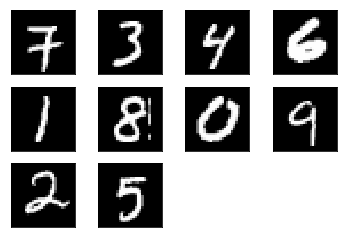

In [5]:
# Initialize
N = x_train.shape[0]
D = x_train.shape[1]
K = 10
x = np.transpose(x_train)
x = x / np.linalg.norm(x, axis = 0)
# x D*N

choice = np.array([14,36,33,18,4,9,7,8,16,28])
# np.random.choice(N,K,replace=False)
mu = x[:,choice]
mu = mu / np.linalg.norm(mu,axis = 0)
# mu D*K

# Plot the means
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(K):
  plt.subplot(3,4,i+1)
  plt.imshow(mu[:,i].reshape((28,28)), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [0]:
# K-means
N = x_train.shape[0]
D = x_train.shape[1]
K = 10
idx = np.arange(N)
mu = mu / np.linalg.norm(mu,axis = 0)
# for i in range(K):
#   print(np.linalg.norm(mu[:,i]))

import time
# Start
# ticks_start = time.time()
# print("Start Time: {}"
#       .format(time.strftime("%H:%M:%S", time.gmtime(ticks_start))))

for iters in range(2000) :
  A = np.transpose(mu)
  # A K*D
  z = np.matmul(A,x)
  # z K*N
  k = np.argmax(z, axis=0)
  
#   Ek = np.zeros((N,K))
#   Ek[idx,k[idx]] = 1
#   new_mu = np.matmul(x, Ek)
  
  
  new_mu = np.zeros((D,K))
  for i in range(N):
    new_mu[:,k[i]] = new_mu[:,k[i]] + x[:,i]
  # new_mu D*K  
  sum = 0
  for i in range(K):
    new_mu[:,i] = new_mu[:,i] / np.sum(k == i)
  mu = new_mu / np.linalg.norm(new_mu,axis = 0)
  
  B = mu

  # B D*K
  
# End
# ticks_end = time.time()
# print("End Time: {}".format(time.strftime("%H:%M:%S", time.gmtime(ticks_end))))
# print("Duration: {}".format(ticks_end - ticks_start)+"s")

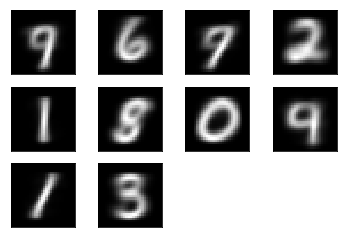

In [66]:
# Plot the means
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(K):
  plt.subplot(3,4,i+1)
  plt.imshow(mu[:,i].reshape((28,28)), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [65]:
# Test
x_t = np.transpose(x_test)
# x_test D*N
n = x_t.shape[1]
x_t = x_t / np.linalg.norm(x_t,axis = 0)
labels = np.array([9,6,7,2,1,8,0,4,5,3])
temp = np.matmul(A,x_t)
test_k = np.argmax(temp, axis=0)
res = np.zeros(n)
for i in range(n):
  res[i] = labels[test_k[i]]
poe = np.sum(res != y_test)/ n
print("Probability of error is {}".format(poe))
old_mu = mu


Probability of error is 0.4438


# **PCA + k Means p = 6**


In [6]:
# PCA
p = 6

N = 10000
sample_idx = np.random.choice(x_train.shape[0], N, replace=False)
x_sample = x_train[sample_idx]
y_sample = y_train[sample_idx]
D = x_sample.shape[1]
one_vec = np.ones((N,1), dtype = int)
M = np.eye(N) - (one_vec @ np.transpose(one_vec)) / N

mean = np.ones(N) @ x_sample
mean /= N

# temp = np.transpose(x_sample)
# temp = temp @ M
# temp = temp @ x_sample
# Sig = temp/N
# Sig = (np.transpose(x_train) @ (M) @ x_train) /N
# Center the data
x_c = x_sample.copy()
for i in range(N):
  x_c[i] -= mean
x_c_temp = x_c
  
# Compute Covariance
Sig = np.zeros((D,D))
for i in range(N):
  Sig += x_c[i].reshape(784,1) @ x_c[i].reshape(1,784)
Sig = Sig / N

# Compute Eigvalues 
w, v = np.linalg.eigh(Sig)
w = w[::-1]
v = v[:,::-1]
print("p={}".format(p))
phi = np.transpose(v[:,0:p])
# phi P*D

# K-means
K = 10
z = np.matmul(phi, np.transpose(x_sample) @ M)
z = z / np.linalg.norm(z,axis = 0)
# mu = z[:,np.random.choice(N,K,replace=False)]
mu = z[:,choice]
mu = mu / np.linalg.norm(mu,axis = 0)
for iters in range(1000) :
  A = np.transpose(mu)
  # A K*P
  code = np.matmul(A,z)
  # code K*N
  k = np.argmax(code, axis=0)
  new_mu = np.zeros((p,K))
  for i in range(N):
    new_mu[:,k[i]] = new_mu[:,k[i]] + z[:,i]
  # new_mu P*K  
  for i in range(K):
    new_mu[:,i] = new_mu[:,i] / np.sum(k == i)
  mu = new_mu / np.linalg.norm(new_mu,axis = 0)
  B = mu


       
       
       

p=6


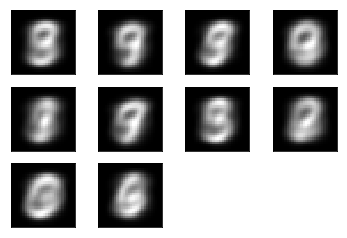

In [7]:
# Plot the means
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(K):
  plt.subplot(3,4,i+1)
  x_r = np.matmul(np.transpose(phi),mu[:,i]) + mean
  plt.imshow(x_r.reshape((28,28)), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [11]:
# Test
n = x_test.shape[0]
one_vec = np.ones(n).reshape(n,1)
M = np.eye(n) - (one_vec @ np.transpose(one_vec)) / n
z_test = np.matmul(phi, np.transpose(x_test) @ M)
z_test = z_test / np.linalg.norm(z_test,axis = 0)
test_code = np.matmul(A,z_test)
test_k = np.argmax(test_code, axis=0)     

labels = np.array([8,9,5,4,1,7,3,2,0,6])

  
res = np.zeros(n)
for i in range(n):
  res[i] = labels[test_k[i]]
for j in range(K):
  poe = 1 - np.sum((res == j) & (y_test == j)) / np.sum(y_test == j)
  print("Probability of error of class {0} is {1}".format(j,poe))
poe = np.sum(res != y_test)/ n
print("Probability of error is {}".format(poe))

Probability of error of class 0 is 0.11224489795918369
Probability of error of class 1 is 0.048458149779735726
Probability of error of class 2 is 0.3914728682170543
Probability of error of class 3 is 0.5108910891089109
Probability of error of class 4 is 0.6934826883910388
Probability of error of class 5 is 0.7477578475336323
Probability of error of class 6 is 0.35803757828810023
Probability of error of class 7 is 0.5389105058365758
Probability of error of class 8 is 0.608829568788501
Probability of error of class 9 is 0.5173439048562933
Probability of error is 0.4445


# **PCA + k Means p = 25**


In [12]:
# PCA
p = 25

N = 10000
sample_idx = np.random.choice(x_train.shape[0], N, replace=False)
x_sample = x_train[sample_idx]
y_sample = y_train[sample_idx]
D = x_sample.shape[1]
one_vec = np.ones((N,1), dtype = int)
M = np.eye(N) - (one_vec @ np.transpose(one_vec)) / N

mean = np.ones(N) @ x_sample
mean /= N

# temp = np.transpose(x_sample)
# temp = temp @ M
# temp = temp @ x_sample
# Sig = temp/N
# Sig = (np.transpose(x_train) @ (M) @ x_train) /N
# Center the data
x_c = x_sample.copy()
for i in range(N):
  x_c[i] -= mean
x_c_temp = x_c
  
# Compute Covariance
Sig = np.zeros((D,D))
for i in range(N):
  Sig += x_c[i].reshape(784,1) @ x_c[i].reshape(1,784)
Sig = Sig / N

# Compute Eigvalues 
w, v = np.linalg.eigh(Sig)
w = w[::-1]
v = v[:,::-1]
print("p={}".format(p))
phi = np.transpose(v[:,0:p])
# phi P*D

# K-means
K = 10
z = np.matmul(phi, np.transpose(x_sample) @ M)
z = z / np.linalg.norm(z,axis = 0)
# mu = z[:,np.random.choice(N,K,replace=False)]
mu = z[:,choice]
mu = mu / np.linalg.norm(mu,axis = 0)
for iters in range(1000) :
  A = np.transpose(mu)
  # A K*P
  code = np.matmul(A,z)
  # code K*N
  k = np.argmax(code, axis=0)
  new_mu = np.zeros((p,K))
  for i in range(N):
    new_mu[:,k[i]] = new_mu[:,k[i]] + z[:,i]
  # new_mu P*K  
  for i in range(K):
    new_mu[:,i] = new_mu[:,i] / np.sum(k == i)
  mu = new_mu / np.linalg.norm(new_mu,axis = 0)
  B = mu


       
       
       

p=25


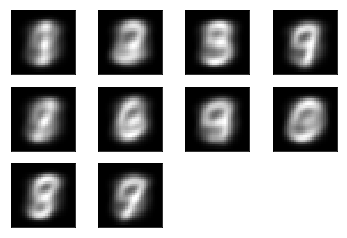

In [14]:
# Plot the means
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(K):
  plt.subplot(3,4,i+1)
  x_r = np.matmul(np.transpose(phi),mu[:,i]) + mean
  plt.imshow(x_r.reshape((28,28)), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [19]:
# Test
n = x_test.shape[0]
one_vec = np.ones(n).reshape(n,1)
M = np.eye(n) - (one_vec @ np.transpose(one_vec)) / n
z_test = np.matmul(phi, np.transpose(x_test) @ M)
z_test = z_test / np.linalg.norm(z_test,axis = 0)
test_code = np.matmul(A,z_test)
test_k = np.argmax(test_code, axis=0)     

labels = np.array([1,2,3,9,5,6,4,0,8,7])

  
res = np.zeros(n)
for i in range(n):
  res[i] = labels[test_k[i]]
for j in range(K):
  poe = 1 - np.sum((res == j) & (y_test == j)) / np.sum(y_test == j)
  print("Probability of error of class {0} is {1}".format(j,poe))
poe = np.sum(res != y_test)/ n
print("Probability of error is {}".format(poe))

Probability of error of class 0 is 0.0836734693877551
Probability of error of class 1 is 0.43524229074889864
Probability of error of class 2 is 0.312984496124031
Probability of error of class 3 is 0.31089108910891095
Probability of error of class 4 is 0.6089613034623218
Probability of error of class 5 is 0.8542600896860987
Probability of error of class 6 is 0.1951983298538622
Probability of error of class 7 is 0.6011673151750972
Probability of error of class 8 is 0.4537987679671458
Probability of error of class 9 is 0.5569871159563924
Probability of error is 0.4382


# **PCA + k Means p = 86**


In [20]:
# PCA
p = 86

N = 10000
sample_idx = np.random.choice(x_train.shape[0], N, replace=False)
x_sample = x_train[sample_idx]
y_sample = y_train[sample_idx]
D = x_sample.shape[1]
one_vec = np.ones((N,1), dtype = int)
M = np.eye(N) - (one_vec @ np.transpose(one_vec)) / N

mean = np.ones(N) @ x_sample
mean /= N

# temp = np.transpose(x_sample)
# temp = temp @ M
# temp = temp @ x_sample
# Sig = temp/N
# Sig = (np.transpose(x_train) @ (M) @ x_train) /N
# Center the data
x_c = x_sample.copy()
for i in range(N):
  x_c[i] -= mean
x_c_temp = x_c
  
# Compute Covariance
Sig = np.zeros((D,D))
for i in range(N):
  Sig += x_c[i].reshape(784,1) @ x_c[i].reshape(1,784)
Sig = Sig / N

# Compute Eigvalues 
w, v = np.linalg.eigh(Sig)
w = w[::-1]
v = v[:,::-1]
print("p={}".format(p))
phi = np.transpose(v[:,0:p])
# phi P*D

# K-means
K = 10
z = np.matmul(phi, np.transpose(x_sample) @ M)
z = z / np.linalg.norm(z,axis = 0)
# mu = z[:,np.random.choice(N,K,replace=False)]
mu = z[:,choice]
mu = mu / np.linalg.norm(mu,axis = 0)
for iters in range(1000) :
  A = np.transpose(mu)
  # A K*P
  code = np.matmul(A,z)
  # code K*N
  k = np.argmax(code, axis=0)
  new_mu = np.zeros((p,K))
  for i in range(N):
    new_mu[:,k[i]] = new_mu[:,k[i]] + z[:,i]
  # new_mu P*K  
  for i in range(K):
    new_mu[:,i] = new_mu[:,i] / np.sum(k == i)
  mu = new_mu / np.linalg.norm(new_mu,axis = 0)
  B = mu


       
       
       

p=86


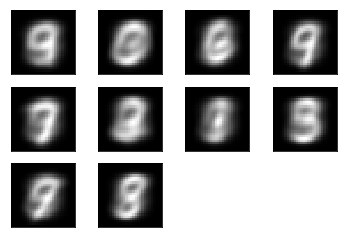

In [21]:
# Plot the means
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(K):
  plt.subplot(3,4,i+1)
  x_r = np.matmul(np.transpose(phi),mu[:,i]) + mean
  plt.imshow(x_r.reshape((28,28)), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [22]:
# Test
n = x_test.shape[0]
one_vec = np.ones(n).reshape(n,1)
M = np.eye(n) - (one_vec @ np.transpose(one_vec)) / n
z_test = np.matmul(phi, np.transpose(x_test) @ M)
z_test = z_test / np.linalg.norm(z_test,axis = 0)
test_code = np.matmul(A,z_test)
test_k = np.argmax(test_code, axis=0)     

labels = np.array([4,0,6,9,7,2,1,3,5,8])

  
res = np.zeros(n)
for i in range(n):
  res[i] = labels[test_k[i]]
for j in range(K):
  poe = 1 - np.sum((res == j) & (y_test == j)) / np.sum(y_test == j)
  print("Probability of error of class {0} is {1}".format(j,poe))
poe = np.sum(res != y_test)/ n
print("Probability of error is {}".format(poe))

Probability of error of class 0 is 0.09183673469387754
Probability of error of class 1 is 0.029074889867841458
Probability of error of class 2 is 0.2906976744186046
Probability of error of class 3 is 0.3227722772277227
Probability of error of class 4 is 0.5835030549898167
Probability of error of class 5 is 0.8183856502242153
Probability of error of class 6 is 0.17536534446764096
Probability of error of class 7 is 0.41245136186770426
Probability of error of class 8 is 0.47946611909650927
Probability of error of class 9 is 0.5460852329038652
Probability of error is 0.3662


# **PCA + k Means p = 100**


In [42]:
# PCA
p = 100

N = 10000
sample_idx = np.random.choice(x_train.shape[0], N, replace=False)
x_sample = x_train[sample_idx]
y_sample = y_train[sample_idx]
D = x_sample.shape[1]
one_vec = np.ones((N,1), dtype = int)
M = np.eye(N) - (one_vec @ np.transpose(one_vec)) / N

mean = np.ones(N) @ x_sample
mean /= N

# temp = np.transpose(x_sample)
# temp = temp @ M
# temp = temp @ x_sample
# Sig = temp/N
# Sig = (np.transpose(x_train) @ (M) @ x_train) /N
# Center the data
x_c = x_sample.copy()
for i in range(N):
  x_c[i] -= mean
x_c_temp = x_c
  
# Compute Covariance
Sig = np.zeros((D,D))
for i in range(N):
  Sig += x_c[i].reshape(784,1) @ x_c[i].reshape(1,784)
Sig = Sig / N

# Compute Eigvalues 
w, v = np.linalg.eigh(Sig)
w = w[::-1]
v = v[:,::-1]
print("p={}".format(p))
phi = np.transpose(v[:,0:p])
# phi P*D

# K-means
K = 10
z = np.matmul(phi, np.transpose(x_sample) @ M)
z = z / np.linalg.norm(z,axis = 0)
# mu = z[:,np.random.choice(N,K,replace=False)]
mu = z[:,choice]
mu = mu / np.linalg.norm(mu,axis = 0)
for iters in range(5000) :
  A = np.transpose(mu)
  # A K*P
  code = np.matmul(A,z)
  # code K*N
  k = np.argmax(code, axis=0)
  new_mu = np.zeros((p,K))
  for i in range(N):
    new_mu[:,k[i]] = new_mu[:,k[i]] + z[:,i]
  # new_mu P*K  
  for i in range(K):
    new_mu[:,i] = new_mu[:,i] / np.sum(k == i)
  mu = new_mu / np.linalg.norm(new_mu,axis = 0)
  B = mu


       
       
       

p=100


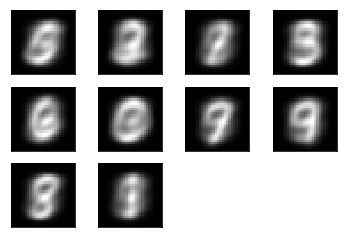

In [43]:
# Plot the means
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(K):
  plt.subplot(3,4,i+1)
  x_r = np.matmul(np.transpose(phi),mu[:,i]) + mean
  plt.imshow(x_r.reshape((28,28)), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [47]:
# Test
n = x_test.shape[0]
one_vec = np.ones(n).reshape(n,1)
M = np.eye(n) - (one_vec @ np.transpose(one_vec)) / n
z_test = np.matmul(phi, np.transpose(x_test) @ M)
z_test = z_test / np.linalg.norm(z_test,axis = 0)
test_code = np.matmul(A,z_test)
test_k = np.argmax(test_code, axis=0)     

labels = np.array([5,2,9,3,6,0,7,4,8,1])

  
res = np.zeros(n)
for i in range(n):
  res[i] = labels[test_k[i]]
for j in range(K):
  poe = 1 - np.sum((res == j) & (y_test == j)) / np.sum(y_test == j)
  print("Probability of error of class {0} is {1}".format(j,poe))
poe = np.sum(res != y_test)/ n
print("Probability of error is {}".format(poe))

Probability of error of class 0 is 0.30102040816326525
Probability of error of class 1 is 0.4361233480176211
Probability of error of class 2 is 0.29941860465116277
Probability of error of class 3 is 0.29900990099009905
Probability of error of class 4 is 0.45621181262729127
Probability of error of class 5 is 0.7533632286995515
Probability of error of class 6 is 0.2359081419624217
Probability of error of class 7 is 0.433852140077821
Probability of error of class 8 is 0.4229979466119097
Probability of error of class 9 is 0.9841427155599604
Probability of error is 0.4598
